# *Atividades sobre Análise Exploratória de Dados - Trilha de IA para Elas*

In [4]:
!pip install -U datasets

In [5]:
#Importa biblioteca para carregar datasets do Hugging face
from datasets import load_dataset
#Importa biblioteca para geração de gráficos
import matplotlib.pyplot as plt
#Importa pandas
import pandas as pd

In [6]:
#Carrega dataset do Hugging face
ds = load_dataset("ruanchaves/b2w-reviews01")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
# Converter para DataFrame
df = pd.DataFrame(ds['train'])

In [8]:
df.columns

Index(['submission_date', 'reviewer_id', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'overall_rating', 'recommend_to_a_friend',
       'review_text', 'reviewer_birth_year', 'reviewer_gender',
       'reviewer_state'],
      dtype='object')

1. Gere um gráfico que mostre a distribuição do número de avaliações por gênero? Dica: Gere um gráfico de barras que represente o número de avaliações por gênero.

In [9]:
df['genero'] = df['reviewer_gender']

Text(0, 0.5, 'Quantidade de Avaliações')

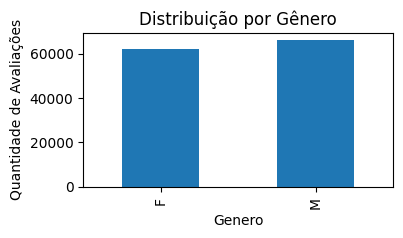

In [10]:
plt.figure(figsize=(4, 2))
df['genero'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição por Gênero')
plt.xlabel('Genero')
plt.ylabel('Quantidade de Avaliações')

2. Gere um gráfico que mostre a proporção do número de avaliações por gênero? Dica: Gere um gráfico de pizza que represente a proporção de avaliações para cada gênero.

<Axes: ylabel='count'>

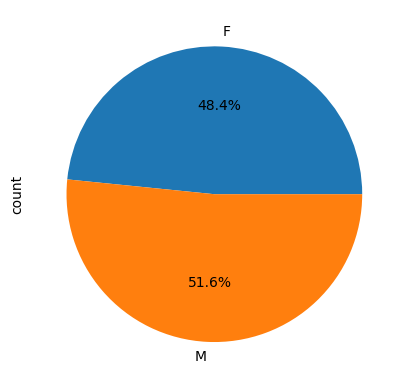

In [ ]:
df['genero'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')

3. Gere um gráfico de barras das 10 categorias de produtos mais avaliadas. Dica: Considere o campo "site_category_lv1" como categoria do produto.

In [11]:
categoria = df['site_category_lv1']
categoria.head(10)

,site_category_lv1
0,Informática
1,Utilidades Domésticas
2,Eletroportáteis
3,Brinquedos
4,TV e Home Theater
5,Utilidades Domésticas
6,Utilidades Domésticas
7,Celulares e Smartphones
8,Casa e Construção
9,Casa e Construção


In [12]:
# Obtém a Series com as contagens das categorias
categoria_counts = categoria.value_counts()

# Seleciona as 10 categorias mais avaliadas
categorias_mais_avaliadas = categoria_counts.head(10)

# Exibe as 10 categorias mais avaliadas (opcional)
print(categorias_mais_avaliadas)

site_category_lv1
Celulares e Smartphones     20859
Eletroportáteis             11745
Beleza e Perfumaria          8962
Utilidades Domésticas        8193
TV e Home Theater            7561
Informática e Acessórios     7469
Móveis                       7166
Brinquedos                   4712
Casa e Construção            4467
Informática                  4262
Name: count, dtype: int64


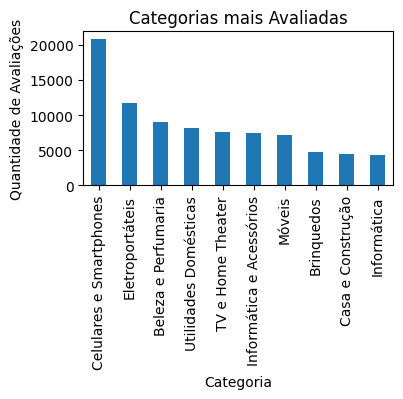

In [13]:
plt.figure(figsize=(4, 2))
# Usar a Series 'categorias_mais_avaliadas' diretamente para plotagem
categorias_mais_avaliadas.plot(kind='bar')
plt.title('Categorias mais Avaliadas')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Avaliações')
plt.show() # Adicionar plt.show() para exibir o gráfico

4. Quais são os 5 produtos mais e menos avaliados? Dica: Utilize as funções head() e tail() para obter os top primeiros e os top ultimos produtos.

In [15]:
categoria.head(5)

,site_category_lv1
0,Informática
1,Utilidades Domésticas
2,Eletroportáteis
3,Brinquedos
4,TV e Home Theater


In [16]:
categoria.tail(5)

,site_category_lv1
132368,Câmeras e Filmadoras
132369,Utilidades Domésticas
132370,Automotivo
132371,Papelaria
132372,Decoração


5. Gere um gráfico de pizza que mostre a proporção de avaliação (1-5) das top 10 categorias de produtos mais vendidas?



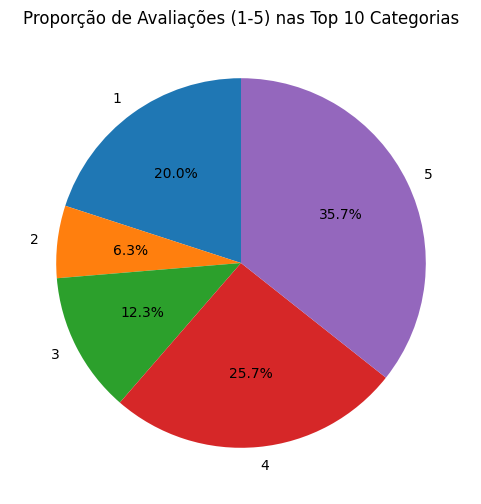

In [17]:
# Filtra o DataFrame para incluir apenas as 10 categorias mais avaliadas
df_top_categorias = df[df['site_category_lv1'].isin(categorias_mais_avaliadas.index)]

# Agrupa por avaliação e conta a ocorrência para as top categorias
avaliacao_top_categorias = df_top_categorias['overall_rating'].value_counts().sort_index()

# Gera o gráfico de pizza
plt.figure(figsize=(6, 6))
avaliacao_top_categorias.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Avaliações (1-5) nas Top 10 Categorias')
plt.ylabel('') # Remove o label padrão do eixo y
plt.show()

6. Gere um gráfico de pizza que mostre a proporção de avaliação (1-5) dos avaliadores entre 31-40 anos?

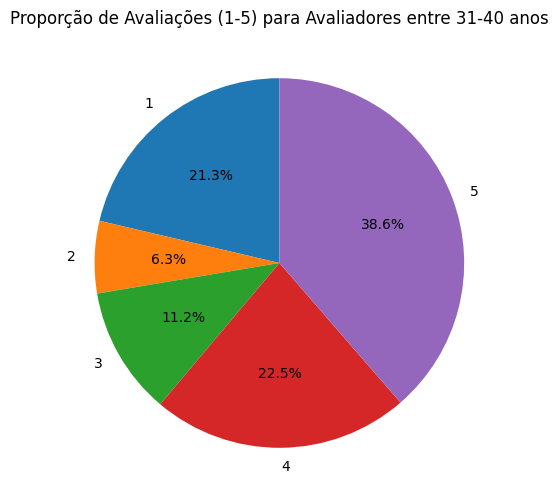

In [19]:
# Filtra o DataFrame para incluir apenas avaliadores na faixa etária de 31-40 anos
df_31_40 = df[(df['reviewer_birth_year'] >= 1985) & (df['reviewer_birth_year'] <= 1994)]

# Agrupa por avaliação e conta a ocorrência para a faixa etária de 31-40 anos
avaliacao_31_40 = df_31_40['overall_rating'].value_counts().sort_index()

# Gera o gráfico de pizza
plt.figure(figsize=(6, 6))
avaliacao_31_40.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Avaliações (1-5) para Avaliadores entre 31-40 anos')
plt.ylabel('') # Remove o label padrão do eixo y
plt.show()

7. Gere uma *wordcloud* das palavras mais frequentes encontradas nos textos das avaliações positivas (considere avaliações positivoas as notas 4 e 5)?

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


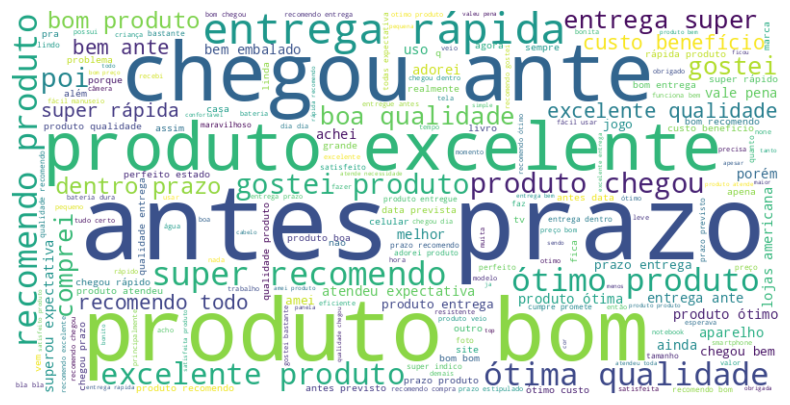

In [20]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Baixar as stopwords em português se ainda não foram baixadas
try:
    stopwords_portuguese = stopwords.words('portuguese')
except LookupError:
    nltk.download('stopwords')
    stopwords_portuguese = stopwords.words('portuguese')

# Filtra avaliações positivas (notas 4 e 5)
df_positivo = df[df['overall_rating'].isin([4, 5])]

# Combina todos os textos das avaliações positivas em uma única string
texto_positivo = " ".join(review for review in df_positivo['review_text'].astype(str))

# Função para limpar o texto (remover pontuação e converter para minúsculas)
def limpar_texto(texto):
    texto = texto.lower()
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    return texto

texto_positivo_limpo = limpar_texto(texto_positivo)

# Remove stopwords
palavras = texto_positivo_limpo.split()
palavras_filtradas = [palavra for palavra in palavras if palavra not in stopwords_portuguese]
texto_filtrado = " ".join(palavras_filtradas)

# Cria a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_filtrado)

# Exibe a wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

8. Gere uma nuvem de palavras para cada faixa etária de idade (['<20', '21–30', '31–40', '41–50', '51–60', '60+']) considerando o título das avaliações (campo 'review_title').

In [22]:
# Função para limpar o texto (remover pontuação e converter para minúsculas)
def limpar_texto(texto):
    if isinstance(texto, str): # Verifica se é string antes de limpar
        texto = texto.lower()
        texto = texto.translate(str.maketrans('', '', string.punctuation))
        return texto
    return "" # Retorna string vazia se não for string

ano_atual = 2025 # Definido como 2025 conforme solicitado
def categorizar_idade(ano_nascimento):
    if pd.isna(ano_nascimento): # Verifica se o valor é NaN (missing)
        return None
    idade = ano_atual - ano_nascimento
    if idade < 20:
        return '<20'
    elif 21 <= idade <= 30:
        return '21–30'
    elif 31 <= idade <= 40:
        return '31–40'
    elif 41 <= idade <= 50:
        return '41–50'
    elif 51 <= idade <= 60:
        return '51–60'
    else:
        return '60+'

df['faixa_etaria'] = df['reviewer_birth_year'].apply(categorizar_idade)

# Itera sobre as faixas etárias e gera a wordcloud para cada uma
faixas_etarias = ['<20', '21–30', '31–40', '41–50', '51–60', '60+']

for faixa in faixas_etarias:
    df_faixa = df[df['faixa_etaria'] == faixa]
    texto_faixa = " ".join(review for review in df_faixa['review_title'].astype(str))

    texto_faixa_limpo = limpar_texto(texto_faixa)

    palavras_faixa = texto_faixa_limpo.split()
    palavras_filtradas_faixa = [palavra for palavra in palavras_faixa if palavra not in stopwords_portuguese]
    texto_filtrado_faixa = " ".join(palavras_filtradas_faixa)

    if texto_filtrado_faixa: # Gera a wordcloud apenas se houver texto filtrado
        wordcloud_faixa = WordCloud(width=800, height=400, background_color='white').generate(texto_filtrado_faixa)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud_faixa, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Nuvem de Palavras - Faixa Etária: {faixa}')
        plt.show()
    else:
        print(f'Não há dados para a faixa etária: {faixa}')

Output hidden; open in https://colab.research.google.com to view.

9. ***Desafio***: Gere um gráfico de barras com a distribuição de avaliações por faixa etária da idade. Considerar o seguinte range de faixas: '<20', '21–30', '31–40', '41–50', '51–60', '60+'

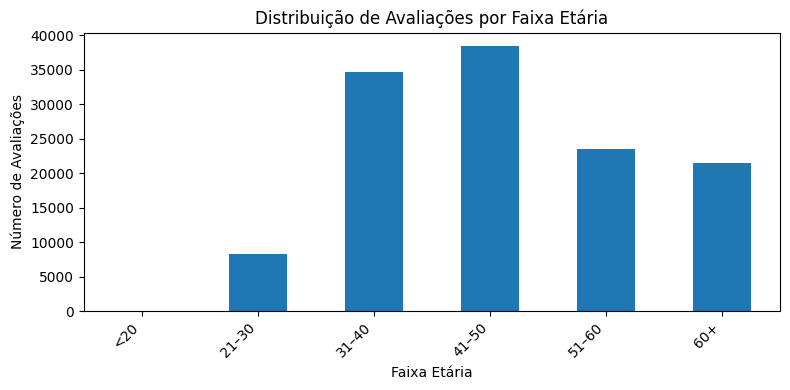

In [23]:
# Calcula a distribuição de avaliações por faixa etária
distribuicao_faixa_etaria = df['faixa_etaria'].value_counts()

# Define a ordem desejada para as faixas etárias
ordem_faixas = ['<20', '21–30', '31–40', '41–50', '51–60', '60+']

# Reorganiza a Series com a ordem desejada (preenche com 0 se uma faixa não existir)
distribuicao_faixa_etaria = distribuicao_faixa_etaria.reindex(ordem_faixas, fill_value=0)

# Gera o gráfico de barras
plt.figure(figsize=(8, 4))
distribuicao_faixa_etaria.plot(kind='bar')
plt.title('Distribuição de Avaliações por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()

10. ***Desafio***: Criar uma tabela cruzada para demonstrar a correlação entre Avaliações e Recomendação ('overall_rating') para uma amigo ('recommend_to_a_friend'). Dica: utilizar a função crosstab do pandas (https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html).

In [24]:
# Cria a tabela cruzada
tabela_cruzada = pd.crosstab(df['overall_rating'], df['recommend_to_a_friend'])

# Exibe a tabela cruzada
print(tabela_cruzada)

recommend_to_a_friend     No    Yes
overall_rating                     
1                      26574    795
2                       6321   2068
3                       1879  14434
4                        508  31837
5                        705  47234


In [26]:
#estilizando a tabela
tabela_cruzada_estilizada = tabela_cruzada.style.background_gradient(cmap='Blues')
display(tabela_cruzada)

recommend_to_a_friend,No,Yes
overall_rating,,
1,26574,795
2,6321,2068
3,1879,14434
4,508,31837
5,705,47234
